In [75]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyser import *

plt.style.use('ggplot')

In [76]:
subs = generate_submissions(users=4, pbls=4)
#subs = import_submissions(course_id = "C00198", dbname="test1")
bm = bianary_mat(subs)

In [77]:
from itertools import product

def tot_vec(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        table[u][p] = subs[(subs.user_id == u) & (subs.problem_id == p)].submission_uid.count()

    return table

def succes_mat(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        table[u][p] = subs[(subs.user_id == u) & (subs.problem_id == p) & 
                           (subs.veredict == "AC")].submission_uid.count()

    return table


In [78]:
def succes_means(subs, col_name='problem_id'):
    
    idx = subs[col_name].unique()
    df = pd.DataFrame(index=idx, columns=["tots", "goods", "means"])


    for i in idx:
        #print dfProbs
        df.tots[i] = subs[(subs[col_name] == i)].submission_uid.count()
        df.goods[i] = subs[(subs[col_name] == i) & (subs.veredict == "AC")].submission_uid.count()
        if df.tots[i]:
            df.means[i] = float(df.goods[i]) / df.tots[i]

    return df


In [79]:
pblsLev = succes_means(subs)
pblsLev

,tots,goods,means
P00000,14,4,0.285714
P00001,9,4,0.444444
P00002,10,3,0.3
P00003,10,1,0.1


In [81]:
UsrLev = succes_means(subs, col_name="user_id")
UsrLev

,tots,goods,means
U00000,7,2,0.285714
U00001,15,4,0.266667
U00002,14,3,0.214286
U00003,7,3,0.428571


# Initialisation

In [82]:
Difficulties = pd.Series(pblsLev.means, index=bm.index, name='Diff_0')
normalize(Difficulties)
Abilities = pd.Series(UsrLev.means, index=bm.columns, name='Abil_0')
normalize(Abilities)

In [83]:
dfAbl = pd.DataFrame(Abilities)
dfDiff = pd.DataFrame(Difficulties)

In [84]:
dfAbl

,Abil_0
U00000,0.462072
U00001,0.431267
U00002,0.346554
U00003,0.693108


In [85]:
dfDiff

,Diff_0
P00000,0.464001
P00001,0.721779
P00002,0.487201
P00003,0.1624


# First Iteration

In [86]:
i = 1

In [87]:
Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
i+=1

In [88]:
dfAbl[Abilities.name] = Abilities
dfDiff[Difficulties.name] = Difficulties

In [89]:
dfDiff

,Diff_0,Diff_1
P00000,0.464001,0.616763
P00001,0.721779,0.616763
P00002,0.487201,0.469330
P00003,0.1624,0.137605


In [90]:
dfAbl

,Abil_0,Abil_1
U00000,0.462072,0.376953
U00001,0.431267,0.562427
U00002,0.346554,0.520376
U00003,0.693108,0.520376


# Let's Iterate !

In [91]:
cnt = 5
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl[Abilities.name] = Abilities
    dfDiff[Difficulties.name] = Difficulties


In [92]:
dfDiff

,Diff_0,Diff_1,Diff_2,Diff_3,Diff_4,Diff_5,Diff_6
P00000,0.464001,0.616763,0.604544,0.603586,0.603514,0.603509,0.603509
P00001,0.721779,0.616763,0.604544,0.603586,0.603514,0.603509,0.603509
P00002,0.487201,0.469330,0.489458,0.490903,0.491010,0.491018,0.491018
P00003,0.1624,0.137605,0.171711,0.174303,0.174500,0.174514,0.174516


<IPython.core.display.Javascript object>


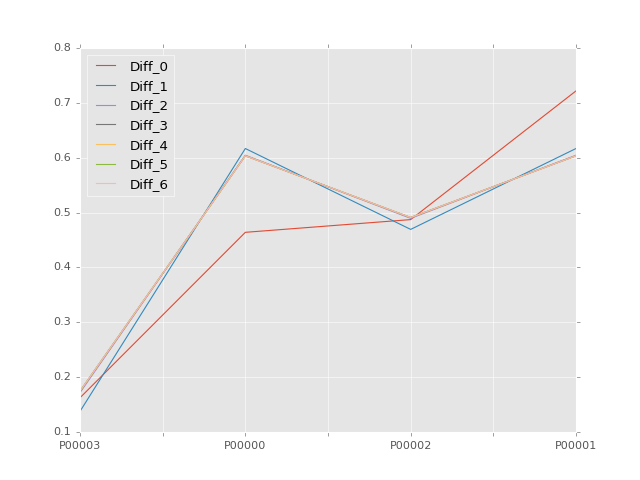

In [93]:
dfDiff.sort_values(['Diff_0'], inplace=True)
dfDiff.plot()

In [94]:
dfAbl

,Abil_0,Abil_1,Abil_2,Abil_3,Abil_4,Abil_5,Abil_6
U00000,0.462072,0.376953,0.369114,0.368527,0.368483,0.368480,0.368480
U00001,0.431267,0.562427,0.570958,0.571602,0.571651,0.571655,0.571655
U00002,0.346554,0.520376,0.518537,0.518391,0.518380,0.518379,0.518379
U00003,0.693108,0.520376,0.518537,0.518391,0.518380,0.518379,0.518379


<IPython.core.display.Javascript object>


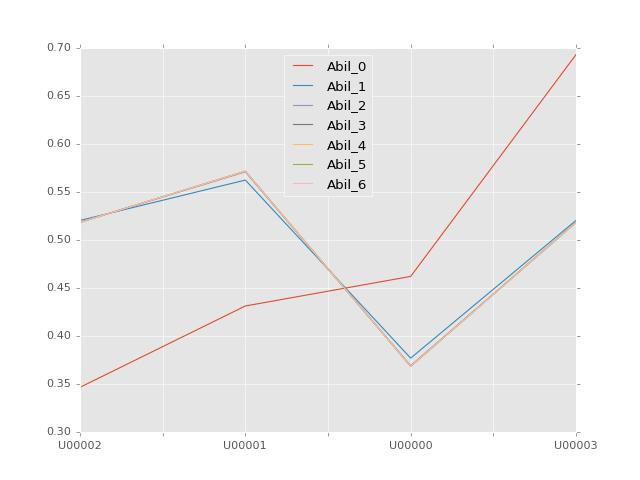

In [99]:
dfAbl.sort_values(['Abil_0'], inplace=True)
dfAbl.plot()

<IPython.core.display.Javascript object>


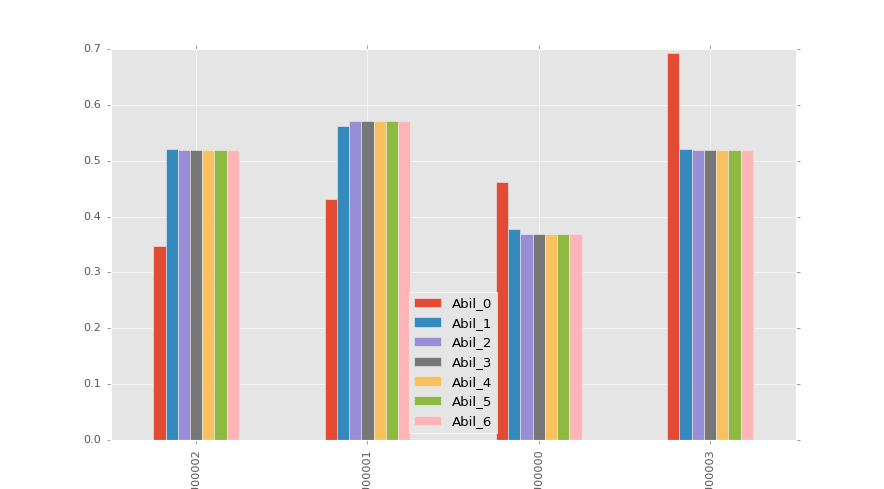

In [97]:
dfAbl.plot(kind='bar')